In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, cv, Pool
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

/Users/corazzon/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [3]:
df = pd.read_csv("data/bank.csv")
df.shape

(11162, 17)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
label_name = "deposit"

https://www.kaggle.com/medyasun/who-are-the-term-deposit-customers-85-accuracy

In [6]:
df.drop(labels = ['duration'], axis = 1, inplace = True)
df['deposit']=df['deposit'].map({'yes':1,'no':0})
df = pd.get_dummies(df, columns=['job','marital','education', 'month', 'default', 'housing',
 'loan', 'contact', 'poutcome'])
# , 'age_bin','balance_cat','pdays_bin','day_cat','day_bins','month_bins'])
cor_deposit=df.corr()
cor_deposit["deposit"].sort_values(ascending=False)

deposit                1.000000
poutcome_success       0.286642
contact_cellular       0.223252
housing_no             0.203888
pdays                  0.151593
previous               0.139867
month_mar              0.135438
month_oct              0.133783
month_sep              0.126901
loan_no                0.110580
job_retired            0.103827
job_student            0.099953
marital_single         0.094632
education_tertiary     0.094598
month_apr              0.090975
month_dec              0.086964
balance                0.081129
month_feb              0.051710
poutcome_other         0.044059
default_no             0.040680
job_management         0.036301
age                    0.034901
job_unemployed         0.033487
poutcome_failure       0.020714
contact_telephone      0.016420
education_unknown      0.014355
marital_divorced       0.005228
job_unknown            0.001889
job_admin.            -0.000610
job_self-employed     -0.004707
job_technician        -0.011557
month_au

In [7]:
df['deposit'].astype(int)

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [8]:
label_name = 'deposit'
x_train = df.drop(labels=[label_name],axis=1)
y_train = df['deposit'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train,test_size=0.25, random_state=2)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8371, 50), (2791, 50), (8371,), (2791,))

In [9]:
kfold = StratifiedKFold(n_splits=10)

In [10]:
random_state = 42
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),
                                      random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))

classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

classifiers.append(XGBClassifier(random_state = random_state))
classifiers.append(LGBMClassifier(random_state = random_state))
classifiers.append(CatBoostClassifier())

In [11]:
for c in classifiers:
    print(c.__class__.__name__)

SVC
DecisionTreeClassifier
AdaBoostClassifier
RandomForestClassifier
ExtraTreesClassifier
GradientBoostingClassifier
MLPClassifier
KNeighborsClassifier
LogisticRegression
LinearDiscriminantAnalysis
XGBClassifier
LGBMClassifier
CatBoostClassifier


In [12]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame(
    {"CrossValMeans":cv_means,"CrossValerrors": 
     cv_std,"Algorithm":[
         "SVC","DecisionTree", "AdaBoost", "RandomForest", "ExtraTrees",
         "GradientBoosting", "MultipleLayerPerceptron", "KNeighboors",
         "LogisticRegression","LinearDiscriminantAnalysis", 'XGBClassifier',
         'LGBMClassifier','CatBoostClassifier']})
cv_res

/Users/corazzon/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


,CrossValMeans,CrossValerrors,Algorithm
0,0.574245,0.016874,SVC
1,0.633257,0.013295,DecisionTree
2,0.634572,0.012869,AdaBoost
3,0.723929,0.011323,RandomForest
4,0.695376,0.008636,ExtraTrees
5,0.736592,0.010326,GradientBoosting
6,0.660489,0.027716,MultipleLayerPerceptron
7,0.589896,0.013064,KNeighboors
8,0.669331,0.016156,LogisticRegression
9,0.698603,0.009740,LinearDiscriminantAnalysis


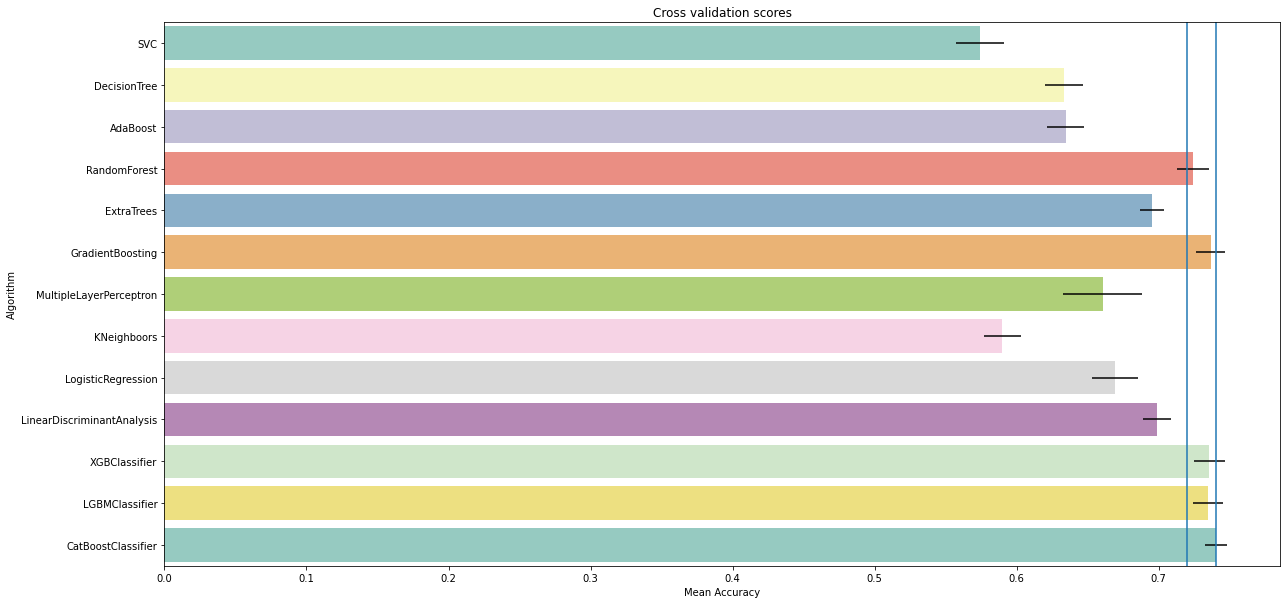

In [13]:
plt.figure(figsize=(20,10))
g = sns.barplot(data = cv_res, x="CrossValMeans", y="Algorithm", palette="Set3", orient = "h", **{'xerr':cv_std})
plt.axvline(0.74)
plt.axvline(0.72)
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")